In [30]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf
import cv2
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split



In [36]:
# Load the LFW dataset
faces = fetch_lfw_people(min_faces_per_person=100)
image_count = faces.images.shape[0]
image_height = faces.images.shape[1]
image_width = faces.images.shape[2]
class_count = len(faces.target_names)




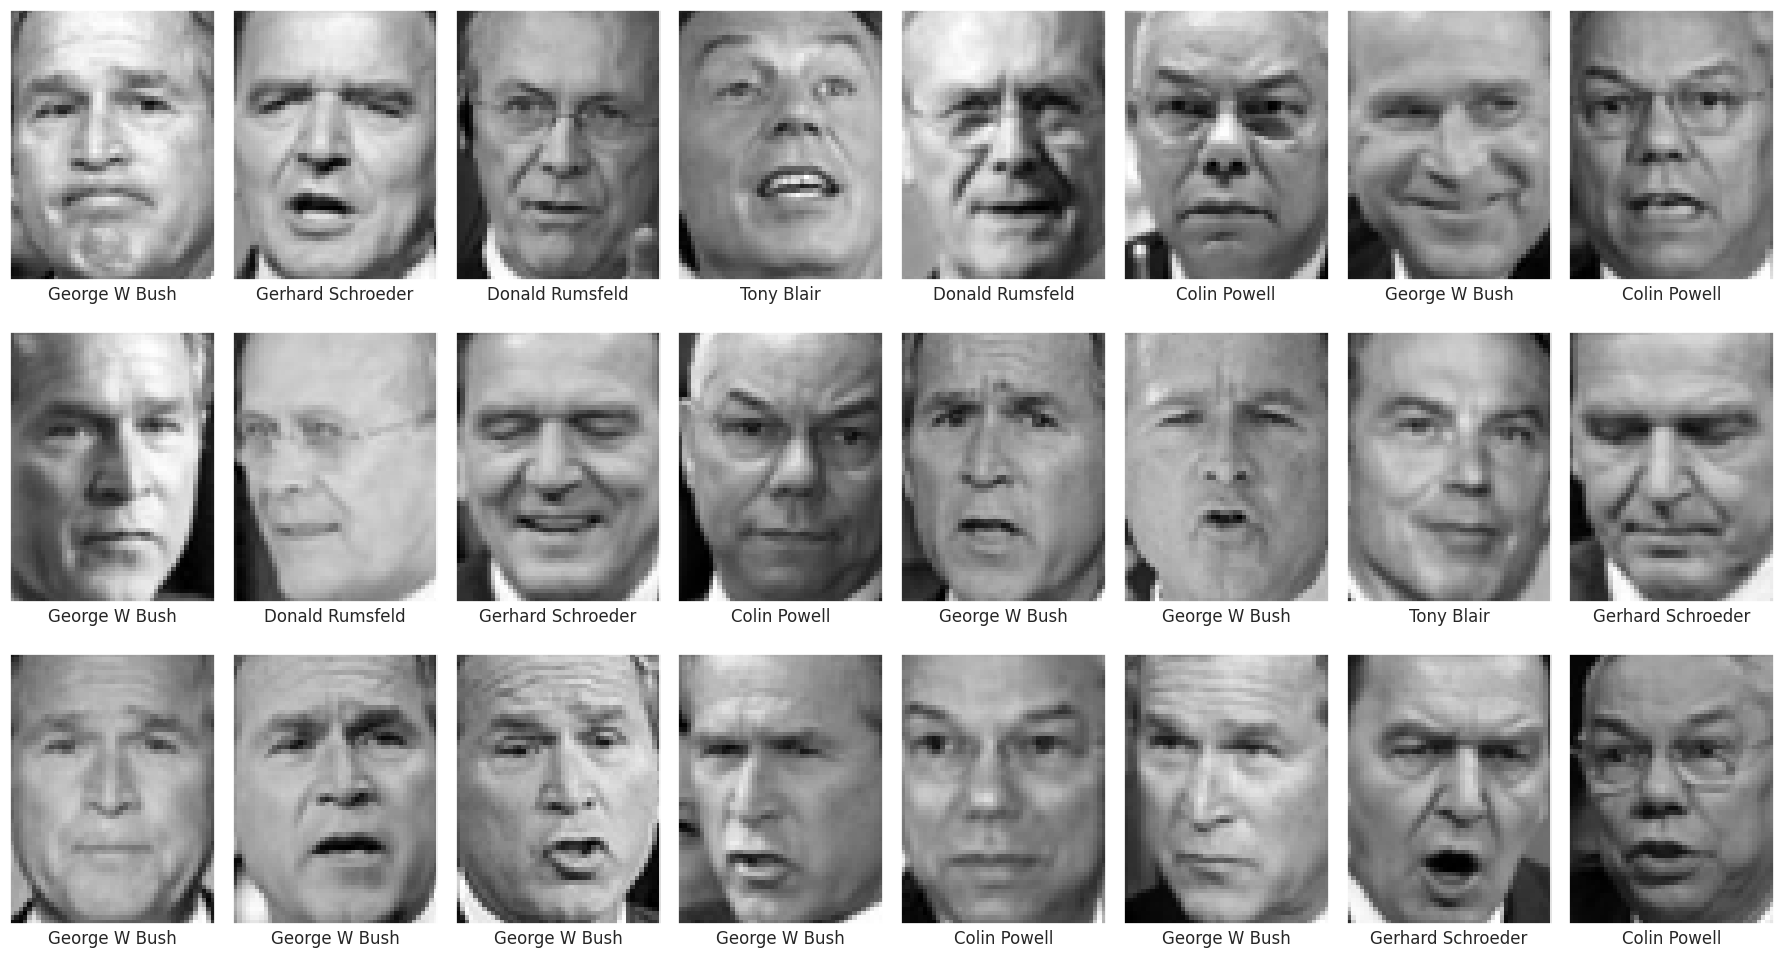

In [35]:
# Display some images from the dataset
fig, ax = plt.subplots(3, 8, figsize=(18, 10))  # 3 rows, 8 columns
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gist_gray')  # Display the image
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])  # Remove axes and add label

plt.tight_layout()
plt.show()


In [33]:
# Preprocess the dataset
X = faces.images
y = faces.target
X = X.astype('float32') / 255.0  # Normalize to [0, 1]
X = np.expand_dims(X, axis=-1)  # Add a channel dimension (grayscale)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(class_count, activation='softmax')  # Output layer
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [38]:

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

# Saving the trained model (optional)
model.save("lfw_face_recognition_model.h5")



Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 229ms/step - accuracy: 0.4584 - loss: 1.4213 - val_accuracy: 0.4649 - val_loss: 1.4039
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 343ms/step - accuracy: 0.4651 - loss: 1.4186 - val_accuracy: 0.4649 - val_loss: 1.4043
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 229ms/step - accuracy: 0.4777 - loss: 1.4037 - val_accuracy: 0.4649 - val_loss: 1.4074
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 225ms/step - accuracy: 0.4900 - loss: 1.3860 - val_accuracy: 0.4649 - val_loss: 1.4051
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 223ms/step - accuracy: 0.4667 - loss: 1.4248 - val_accuracy: 0.4649 - val_loss: 1.4016
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 226ms/step - accuracy: 0.4799 - loss: 1.3993 - val_accuracy: 0.4649 - val_loss: 1.4223
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 346ms/step - accuracy: 0.4681 - loss: 1.4182 - val_accuracy: 0.4649 - val_loss: 1.4023
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 223ms/step - accuracy: 0.4496 - loss: 1.4438 - val_accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


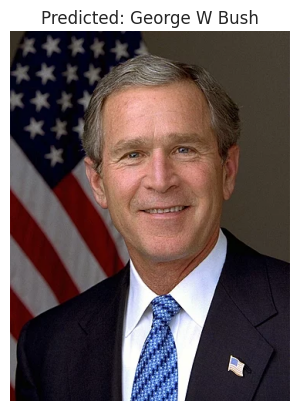

In [37]:
# Code for uploading an image and predicting
def predict_with_image_path(image_path):
    # Load and preprocess the uploaded image
    img = image.load_img(image_path, target_size=(image_height, image_width), color_mode='grayscale')
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array.astype('float32') / 255.0  # Normalize

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    predicted_label = faces.target_names[predicted_class[0]]

    # Display the uploaded image with predicted label as title
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

# Define the image file path
image_path = '/content/George-W-Bush.jpeg.webp'  # Replace with your actual image file path

predict_with_image_path(image_path)